## # Read data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
df =pd.read_csv("C:/Users/El_manfy/Downloads/archive/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## # Data cleaning 

In [4]:
df.shape

(10000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
df.duplicated().any()

True

In [8]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)


In [9]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [10]:
df.shape

(9873, 6)

Text(0.5, 1.0, 'Boxplot of Student Performance')

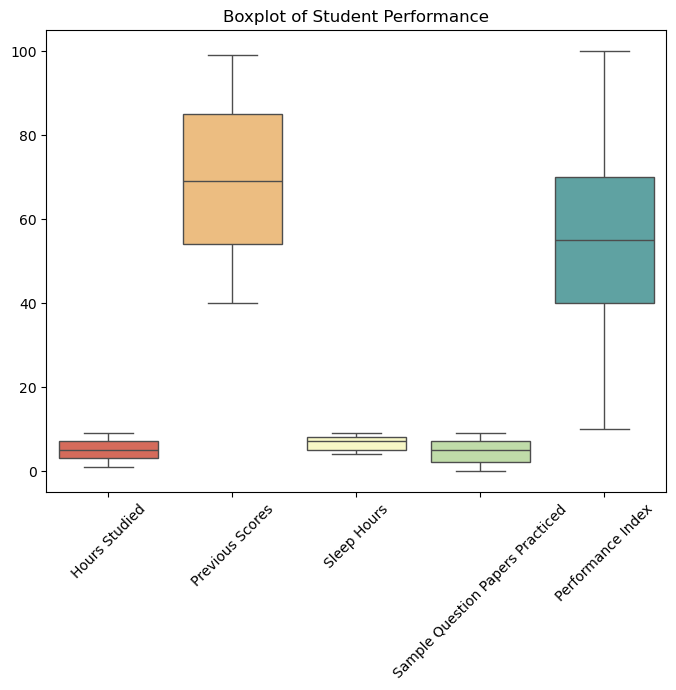

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(df, palette='Spectral')
plt.xticks(rotation=45)
plt.title("Boxplot of Student Performance")

In [12]:
print(df['Extracurricular Activities'].value_counts())

df['Extracurricular Activities' ]= df['Extracurricular Activities'].map ({'Yes': 1, 'No': 0})
print(df['Extracurricular Activities'].value_counts())

Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64
Extracurricular Activities
0    4986
1    4887
Name: count, dtype: int64


In [13]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


## # visualization

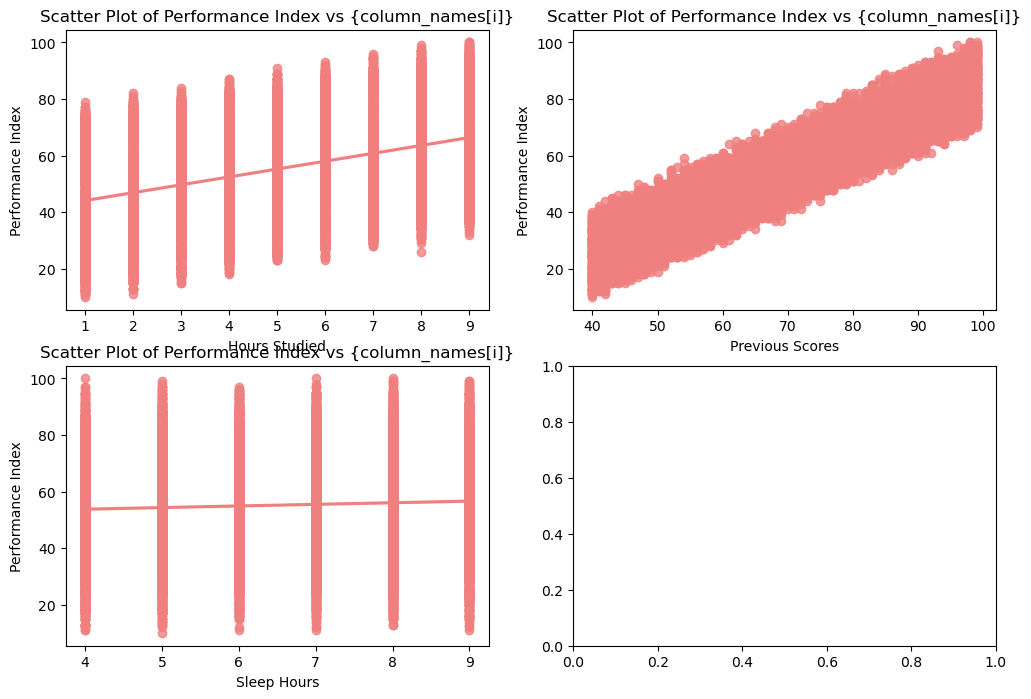

In [15]:
column_names = ['Hours Studied', 'Previous Scores', 'Sleep Hours']
fig , axs = plt.subplots(2, 2, figsize=(12, 8))
for i in range(len(column_names)):  
    sns.regplot( x=column_names[i],y="Performance Index", data=df, marker='o', color='lightcoral',ax=axs[i//2,i%2])
    axs[i//2,i%2] .set_title(r"Scatter Plot of Performance Index vs {column_names[i]}")
    axs[i//2,i%2].set_ylabel("Performance Index")
    axs[i//2,i%2].set_xlabel(column_names[i])
plt.show()    

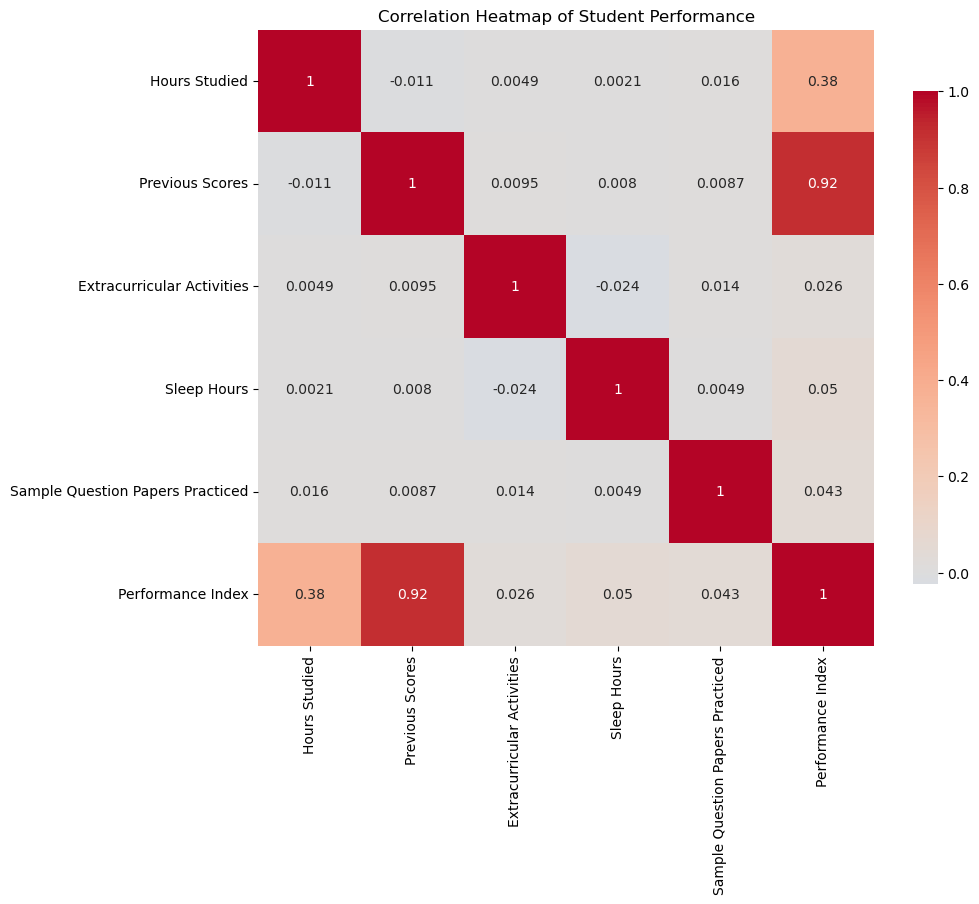

In [16]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Student Performance")
plt.show()

## # plot (3D)

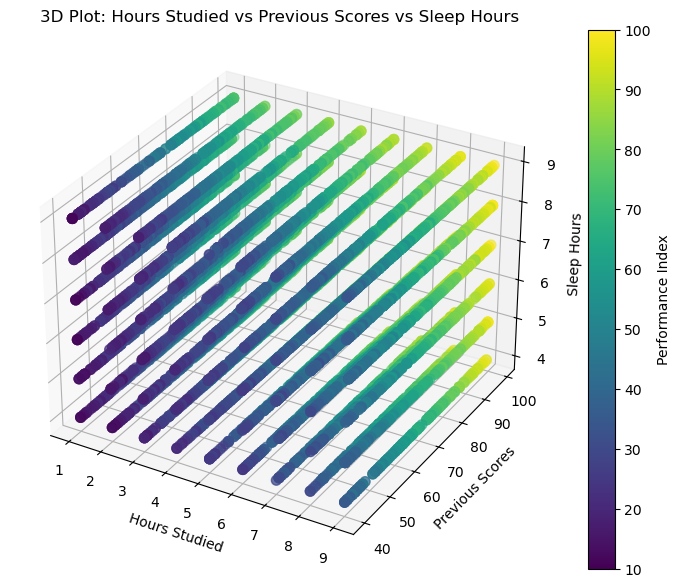

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(
    df['Hours Studied'],        
    df['Previous Scores'],      
    df["Sleep Hours"],    
    c=df['Performance Index'],
    cmap='viridis',
    s=50  
)

ax.set_xlabel('Hours Studied')
ax.set_ylabel('Previous Scores')
ax.set_zlabel("Sleep Hours")
ax.set_title('3D Plot: Hours Studied vs Previous Scores vs Sleep Hours')

plt.colorbar(ax.collections[0], label='Performance Index')

plt.show()

## # Constructor , fit, predict

In [20]:

 X = df[['Hours Studied', 'Previous Scores']]
 y = df['Performance Index']


In [21]:

class MultipleLinearRegression:
    
    def __init__(self):
     
        self.coefficients = None
        self.MSE = None
        self.r_squared = None
        self.n = None
        self.p = None

    def fit(self, X, y):
       
        self.n, self.p = X.shape

        ones = np.ones((self.n, 1))
        X_augmented = np.hstack((ones, X)) 
        XtX = np.dot(X_augmented.T, X_augmented)
        XtX_inv = np.linalg.inv(XtX)
        Xty = np.dot(X_augmented.T, y)
        self.coefficients = np.dot(XtX_inv, Xty)

        y_hat = self.predict(X)
        
        e = y - y_hat
        self.SSE = np.sum(e**2)
        self.MSE = self.SSE / (self.n - self.p - 1)

        y_bar = np.mean(y)
        SST = np.sum((y - y_bar)**2)
        SSR = np.sum((y_hat - y_bar)**2)
        self.r_squared = SSR / SST

    def predict(self, X):
       
        if self.coefficients is None:
            raise ValueError("The model has not been fitted yet.")

        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(1, -1)

        ones = np.ones((X.shape[0], 1))
        X_augmented = np.hstack((ones, X))

        return np.dot(X_augmented, self.coefficients)

    def plot(self, X, y):
     
        if self.coefficients is None:
            raise ValueError("The model has not been fitted yet.")
        
        if X.shape[1] != 2:
            raise ValueError("Plotting is only available for exactly two independent variables.")
        X=np.array(X)
        y=np.array(y)
        x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
        x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
        x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

        y_pred_grid = (
            self.coefficients[0] +
            self.coefficients[1] * x1_grid +
            self.coefficients[2] * x2_grid
        )

        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Data Points')
        ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='red', alpha=0.5)
        
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Target Variable')
        ax.set_title('Multiple Linear Regression - Regression Plane')

        plt.legend()
        plt.show()


In [22]:
model = MultipleLinearRegression()

model.fit(X, y)

predictions = model.predict(X)

print(predictions)

[91.07907413 65.18122652 45.01721219 ... 71.9152234  94.75561573
 65.60028012]


In [23]:
print (f"line of best fit is: y= {round(model.coefficients[0],3)} + {round(model.coefficients[1],3)} *x1 + {round(model.coefficients[2],3)} *x2")
print(f'Mean Squared error is : {round(model.MSE,3)}')
print(f'r_squared is : {round(model.r_squared,3)}')

line of best fit is: y= -29.819 + 2.857 *x1 + 1.019 *x2
Mean Squared error is : 5.243
r_squared is : 0.986


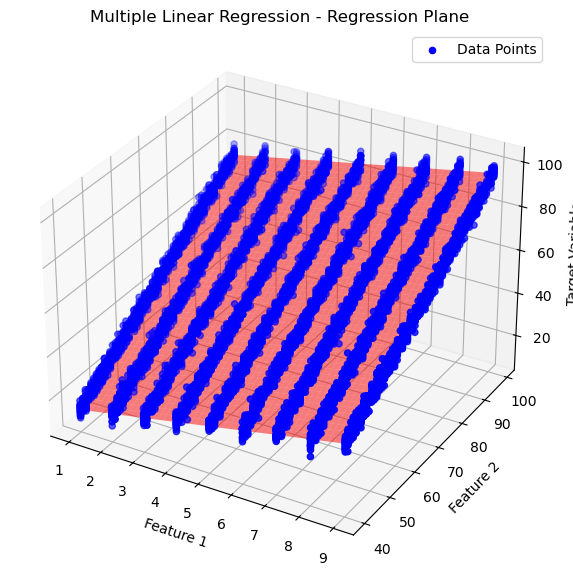

In [24]:
model.plot(X, y)

In [25]:
new_X = df[['Hours Studied', 'Previous Scores']]
new_predictions = model.predict(new_X)
df['Predicted Performance'] = new_predictions

df[['Hours Studied', 'Previous Scores', 'Predicted Performance']]

,Hours Studied,Previous Scores,Predicted Performance
0,7,99,91.079074
1,4,82,65.181227
2,8,51,45.017212
3,5,52,37.464096
4,7,75,66.619432
...,...,...,...
9868,1,49,22.976951
9869,7,64,55.408763
9870,6,83,71.915223
9871,9,97,94.755616


## #ANOVA (Analysis Of Variance), ## hypothesis_test, ## Interval Confidence 

In [27]:
del df['Predicted Performance']
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

class SimpleLinearRegression:
    def __init__(self):
        self.B_0 = None  # Intercept
        self.B_1 = None  # Slope
        self.n = None    # Number of observations
        self.SSR = None  # Regression sum of squares
        self.SSE = None  # Error sum of squares
        self.SST = None  # Total sum of squares
    
    def fit(self, X, y):
        # Add intercept term
        
        X = sm.add_constant(X)
        self.n = len(y)
        
        # Fit the model
        model = sm.OLS(y, X).fit()
        self.B_0 = model.params[0]
        self.B_1 = model.params[1]
        
        # Calculate sums of squares
        y_pred = model.predict(X)
        self.SST = ((y - y.mean())**2).sum()
        self.SSR = ((y_pred - y.mean())**2).sum()
        self.SSE = self.SST - self.SSR
    
    def anova_table(self):
        if self.B_0 is None or self.B_1 is None:
            raise ValueError("The model has not been fitted yet.")
        
        # Degrees of freedom
        self.df_regression = 1
        self.df_error = self.n - 2
        df_total = self.n - 1
        
        # Mean squares
        MSR = self.SSR / self.df_regression
        self.MSE = self.SSE / self.df_error
        
        # F-statistic
        self.F_stat = MSR / self.MSE
        
        # p-value
        p_value = 1 - scipy.stats.f.cdf(self.F_stat, self.df_regression, self.df_error)
        
        # Assemble the ANOVA table
        anova_data = {
            'Source': ['Regression', 'Error', 'Total'],
            'Sum of Squares': [self.SSR, self.SSE, self.SST],
            'Degrees of Freedom': [self.df_regression, self.df_error, df_total],
            'Mean Square': [MSR, self.MSE, ""],
            'F-Statistic': [self.F_stat, "", ""],
            'p-value': [p_value, "", ""]
        }
        
        anova_table = pd.DataFrame(anova_data)
        return anova_table


    # hypothesis_testbyf0
    def hypothesis_testbyf0 (self,alpha=.05):
        
       fc=scipy.stats.f.ppf(1-alpha,self.df_regression,self.df_error)
       print(" ___________________________________________________________________")
       print("                          HYPOTHESIS RESULT       "   )
       print("____________________________________________________________________")
       print(" Null hypothesis (H_0)        :      B_1=0 (No relation between this feature and target) ")
       print(" Alternative hypothesis (H_1) :      B_1!=0 (there relation between this feature and target) ")
       print("_____________________________________________________________________")
       print(f" F_Statistic (F_0)            :       {self.F_stat}")
       print(f" Critical value (F_c)         :       {fc}")
       print("_____________________________________________________________________")
       if self.F_stat > fc:
                    print(" Since f_0 > f_c , we  reject the null hypothesis.\n therefore,there's a relation between this feature and the target ")
       else:
                    print("Since f_0 < f_c , we  don't reject the null hypothesis.\n therefore,there's not a relation between this feature and the target")
       print("_____________________________________________________________________")


    # interval confidence
    def interval(self,x,y,alpha=.05,segma=None):
        x=np.array(x)
        y=np.array(y)
        self.n=len(x)
        x_bar=x.mean()
        y_bar=y.mean()
        sxy=sum(x*y)-self.n*x_bar*y_bar
        sxx=sum(x*x)-self.n*x_bar**2
        if segma==None:
          t=scipy.stats.t.ppf((1-(alpha/2)), self.df_error)
          UpperB0=self.B_0 + t *np.sqrt(self.MSE**2 *((1/self.n) + (x_bar /sxx)))
          DownB0=self.B_0 - t *np.sqrt(self.MSE**2 *((1/self.n) + (x_bar /sxx)))
          UpperB1=self.B_1 + t *np.sqrt(self.MSE/sxx)
          DownB1=self.B_1 - t *np.sqrt(self.MSE/sxx)
          print( f'Using MSE  : B0 estimitor  must exist between   {UpperB0}   and  {DownB0} ')
          print( f'Using MSE  : B1 estimitor  must exist between   {UpperB1}   and  {DownB1} ')
        else:
           t=scipy.stats.norm.ppf((1-(alpha/2)))
           UpperB0=self.B_0 + t *np.sqrt(self.MSE**2 *((1/self.n) + (x_bar /sxx)))
           DownB0=self.B_0 - t *np.sqrt(self.MSE**2 *((1/self.n) + (x_bar /sxx)))
           UpperB1=self.B_1 + t *np.sqrt(self.MSE/sxx)
           DownB1=self.B_1 - t *np.sqrt(self.MSE/sxx)
           print( f'Using segma: B0 estimitor  must exist between   {UpperB0}   and  {DownB0}   ')
           print( f'Using segma: B1 estimitor  must exist between   {UpperB1}   and  {DownB1} ')
     

In [29]:
X = df[['Hours Studied']] 
y = df['Performance Index']   

model = SimpleLinearRegression()
model.fit(X, y)

anova_table = model.anova_table()
anova_table


C:\Users\El_manfy\AppData\Local\Temp\ipykernel_16036\1780378441.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.B_0 = model.params[0]
C:\Users\El_manfy\AppData\Local\Temp\ipykernel_16036\1780378441.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.B_1 = model.params[1]


,Source,Sum of Squares,Degrees of Freedom,Mean Square,F-Statistic,p-value
0,Regression,5.131289e+05,1,513128.890248,1618.585346,0.0
1,Error,3.129335e+06,9871,317.023067,,
2,Total,3.642464e+06,9872,,,


In [30]:
relation=model.hypothesis_testbyf0()
print(  "                         Interval Confidence                   "  )
model.interval(X,y)
model.interval(X,y,segma=X.values.std())

 ___________________________________________________________________
                          HYPOTHESIS RESULT       
____________________________________________________________________
 Null hypothesis (H_0)        :      B_1=0 (No relation between this feature and target) 
 Alternative hypothesis (H_1) :      B_1!=0 (there relation between this feature and target) 
_____________________________________________________________________
 F_Statistic (F_0)            :       1618.5853460113187
 Critical value (F_c)         :       3.842401057898686
_____________________________________________________________________
 Since f_0 > f_c , we  reject the null hypothesis.
 therefore,there's a relation between this feature and the target 
_____________________________________________________________________
                         Interval Confidence                   
Using MSE  : B0 estimitor  must exist between   [49.57671495]   and  [33.05444696] 
Using MSE  : B1 estimitor  must exist 

In [39]:
X = df[['Previous Scores']]   
y = df['Performance Index']  

model = SimpleLinearRegression()
model.fit(X, y)

anova_table = model.anova_table()
anova_table


C:\Users\El_manfy\AppData\Local\Temp\ipykernel_16036\1780378441.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.B_0 = model.params[0]
C:\Users\El_manfy\AppData\Local\Temp\ipykernel_16036\1780378441.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.B_1 = model.params[1]


,Source,Sum of Squares,Degrees of Freedom,Mean Square,F-Statistic,p-value
0,Regression,3.050462e+06,1,3050462.037887,50863.230088,0.0
1,Error,5.920015e+05,9871,59.973817,,
2,Total,3.642464e+06,9872,,,


In [42]:
relation=model.hypothesis_testbyf0()
print(  "                         Interval Confidence                   "  )
model.interval(X,y)
model.interval(X,y,segma=X.values.std())

 ___________________________________________________________________
                          HYPOTHESIS RESULT       
____________________________________________________________________
 Null hypothesis (H_0)        :      B_1=0 (No relation between this feature and target) 
 Alternative hypothesis (H_1) :      B_1!=0 (there relation between this feature and target) 
_____________________________________________________________________
 F_Statistic (F_0)            :       50863.23008799251
 Critical value (F_c)         :       3.842401057898686
_____________________________________________________________________
 Since f_0 > f_c , we  reject the null hypothesis.
 therefore,there's a relation between this feature and the target 
_____________________________________________________________________
                         Interval Confidence                   
Using MSE  : B0 estimitor  must exist between   [-13.92491787]   and  [-16.55071143] 
Using MSE  : B1 estimitor  must exist

In [44]:
X = df[['Extracurricular Activities']]  
y = df['Performance Index']  

model = SimpleLinearRegression()
model.fit(X, y)

anova_table = model.anova_table()
anova_table


C:\Users\El_manfy\AppData\Local\Temp\ipykernel_16036\1780378441.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.B_0 = model.params[0]
C:\Users\El_manfy\AppData\Local\Temp\ipykernel_16036\1780378441.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.B_1 = model.params[1]


,Source,Sum of Squares,Degrees of Freedom,Mean Square,F-Statistic,p-value
0,Regression,2.476454e+03,1,2476.453897,6.715704,0.009571
1,Error,3.639987e+06,9871,368.755661,,
2,Total,3.642464e+06,9872,,,


In [45]:
relation=model.hypothesis_testbyf0()
print(  "                         Interval Confidence                   "  )
model.interval(X,y)
model.interval(X,y,segma=X.values.std())

 ___________________________________________________________________
                          HYPOTHESIS RESULT       
____________________________________________________________________
 Null hypothesis (H_0)        :      B_1=0 (No relation between this feature and target) 
 Alternative hypothesis (H_1) :      B_1!=0 (there relation between this feature and target) 
_____________________________________________________________________
 F_Statistic (F_0)            :       6.715704081145653
 Critical value (F_c)         :       3.842401057898686
_____________________________________________________________________
 Since f_0 > f_c , we  reject the null hypothesis.
 therefore,there's a relation between this feature and the target 
_____________________________________________________________________
                         Interval Confidence                   
Using MSE  : B0 estimitor  must exist between   [67.27921299]   and  [42.16242359] 
Using MSE  : B1 estimitor  must exist b

In [46]:
X = df[['Sleep Hours']] 
y = df['Performance Index']   

model = SimpleLinearRegression()
model.fit(X, y)

anova_table = model.anova_table()
anova_table


C:\Users\El_manfy\AppData\Local\Temp\ipykernel_16036\1780378441.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.B_0 = model.params[0]
C:\Users\El_manfy\AppData\Local\Temp\ipykernel_16036\1780378441.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.B_1 = model.params[1]


,Source,Sum of Squares,Degrees of Freedom,Mean Square,F-Statistic,p-value
0,Regression,9.234999e+03,1,9234.998829,25.090267,0.000001
1,Error,3.633229e+06,9871,368.070974,,
2,Total,3.642464e+06,9872,,,


In [47]:
relation=model.hypothesis_testbyf0()
print(  "                         Interval Confidence                   "  )
model.interval(X,y)
model.interval(X,y,segma=X.values.std())

 ___________________________________________________________________
                          HYPOTHESIS RESULT       
____________________________________________________________________
 Null hypothesis (H_0)        :      B_1=0 (No relation between this feature and target) 
 Alternative hypothesis (H_1) :      B_1!=0 (there relation between this feature and target) 
_____________________________________________________________________
 F_Statistic (F_0)            :       25.09026650613073
 Critical value (F_c)         :       3.842401057898686
_____________________________________________________________________
 Since f_0 > f_c , we  reject the null hypothesis.
 therefore,there's a relation between this feature and the target 
_____________________________________________________________________
                         Interval Confidence                   
Using MSE  : B0 estimitor  must exist between   [64.61893838]   and  [38.37197642] 
Using MSE  : B1 estimitor  must exist b

In [49]:
X = df[['Sample Question Papers Practiced']] 
y = df['Performance Index']   

model = SimpleLinearRegression()
model.fit(X, y)

anova_table = model.anova_table()
anova_table


C:\Users\El_manfy\AppData\Local\Temp\ipykernel_16036\1780378441.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.B_0 = model.params[0]
C:\Users\El_manfy\AppData\Local\Temp\ipykernel_16036\1780378441.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.B_1 = model.params[1]


,Source,Sum of Squares,Degrees of Freedom,Mean Square,F-Statistic,p-value
0,Regression,6.872095e+03,1,6872.094748,18.658435,0.000016
1,Error,3.635591e+06,9871,368.310352,,
2,Total,3.642464e+06,9872,,,


In [56]:
relation=model.hypothesis_testbyf0()
print(  "                         Interval Confidence                  "  )
model.interval(X,y)
model.interval(X,y,segma=X.values.std())

 ___________________________________________________________________
                          HYPOTHESIS RESULT       
____________________________________________________________________
 Null hypothesis (H_0)        :      B_1=0 (No relation between this feature and target) 
 Alternative hypothesis (H_1) :      B_1!=0 (there relation between this feature and target) 
_____________________________________________________________________
 F_Statistic (F_0)            :       18.658434944042003
 Critical value (F_c)         :       3.842401057898686
_____________________________________________________________________
 Since f_0 > f_c , we  reject the null hypothesis.
 therefore,there's a relation between this feature and the target 
_____________________________________________________________________
                         Interval Confidence                  
Using MSE  : B0 estimitor  must exist between   [62.95100647]   and  [44.81504547] 
Using MSE  : B1 estimitor  must exist b

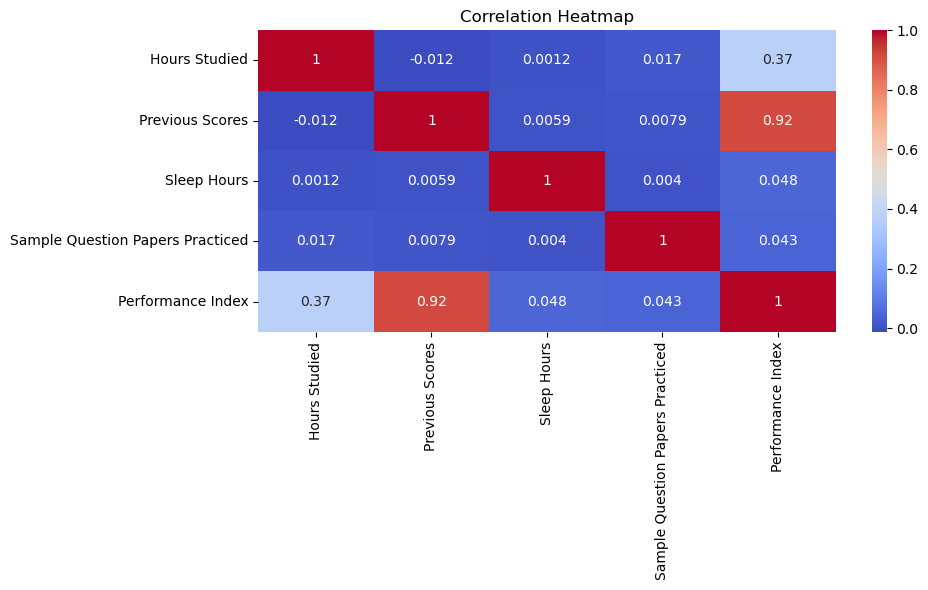

In [72]:
# النسخة المحدّثة والمُنظّمة للكود حسب طلبك

import customtkinter as ctk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tkinter import messagebox
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import numpy as np

# تحميل البيانات
df = pd.read_csv("C:/Users/El_manfy/Downloads/archive/Student_Performance.csv")  # غيّر المسار حسب الحاجة

# إعداد الواجهة
ctk.set_appearance_mode("dark")
ctk.set_default_color_theme("green")

class LinearRegressionApp(ctk.CTk):
    def __init__(self):
        super().__init__()
        self.title("💖 Multipule Linear Regression GUI 💖")
        self.geometry("1200x700")
        self.df = df
        self.model = None
        self.create_widgets()

    def create_widgets(self):
        self.title_label = ctk.CTkLabel(self, text="💖 Multipule Linear Regression 💖", font=("Arial Rounded MT Bold", 40))
        self.title_label.pack(pady=20)

        self.sidebar = ctk.CTkFrame(self, width=200)
        self.sidebar.pack(side="left", fill="y", padx=20, pady=10)

        self.clean_button = ctk.CTkButton(self.sidebar, text="🧼 Clean Data", command=self.clean_data)
        self.clean_button.pack(pady=15)

        self.visual_button = ctk.CTkButton(self.sidebar, text="📊 Visualization", command=self.visual_menu)
        self.visual_button.pack(pady=15)

        self.multiple_button = ctk.CTkButton(self.sidebar, text="📈 Multiple Regression", command=self.multiple_menu)
        self.multiple_button.pack(pady=15)

        self.anova_button = ctk.CTkButton(self.sidebar, text="🧪 ANOVA", command=self.anova_menu)
        self.anova_button.pack(pady=15)

        self.hypothesis_button = ctk.CTkButton(self.sidebar, text="📌 Hypothesis Test", command=self.hypothesis_menu)
        self.hypothesis_button.pack(pady=15)

        self.interval_button = ctk.CTkButton(self.sidebar, text="📉 Confidence Interval", command=self.interval_menu)
        self.interval_button.pack(pady=15)

        self.output_frame = ctk.CTkTextbox(self, width=900, height=300)
        self.output_frame.pack(pady=10, padx=10, fill="both", expand=True)

    def clean_data(self):
        buffer = []
        buffer.append(f"Shape: {self.df.shape}")
        buffer.append(f"Duplicated Rows: {self.df.duplicated().sum()}")
        buffer.append(f"Missing Values:\n{self.df.isnull().sum()}\n")
        buffer.append(f"Data Types:\n{self.df.dtypes}")
        self.output_frame.delete("1.0", "end")
        self.output_frame.insert("end", "\n\n".join(buffer))

    def visual_menu(self):
        win = ctk.CTkToplevel(self)
        win.title("📊 Visualization Options")
        win.geometry("400x300")
        win.grab_set()  # Ensure new window is in front

        buttons = [
            ("Correlation Heatmap", self.show_corr),
            ("Pairplot", self.show_pairplot),
            ("Relation ",self.show_relation),
            ("3D plot",self.Dplot)
        ]

        for text, cmd in buttons:
            btn = ctk.CTkButton(win, text=text, command=cmd)
            btn.pack(pady=15)
    def show_relation(self):
        column_names = ['Hours Studied', 'Previous Scores', 'Sleep Hours']
        fig , axs = plt.subplots(2, 2, figsize=(12, 8))
        for i in range(4):
            sns.regplot(x=column_names[i], y="Performance Index", data=self.df,
                marker='o', color='lightcoral', ax=axs[i//2, i%2])

            axs[i//2,i%2] .set_title(r"Scatter Plot of Performance Index vs {column_names[i]}")
            axs[i//2,i%2].set_ylabel("Performance Index")
            axs[i//2,i%2].set_xlabel(column_names[i])
        plt.show()    
    def show_corr(self):
        plt.figure(figsize=(10, 6))
        sns.heatmap(self.df.corr(numeric_only=True), annot=True, cmap="coolwarm")
        plt.title("Correlation Heatmap")
        plt.tight_layout()
        plt.show()

    def show_pairplot(self):
        sns.pairplot(self.df.select_dtypes(include='number').dropna().iloc[:, :4])
        plt.suptitle("Pairplot (First 4 Numeric Columns)", y=1.02)
        plt.show()
    def Dplot (self):
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(
                 self.df['Hours Studied'],        
                 self.df['Previous Scores'],      
                 self.df["Sleep Hours"],    
               c=self.df['Performance Index'],
               cmap='viridis',
               s=50  
                   )
 
        ax.set_xlabel('Hours Studied')
        ax.set_ylabel('Previous Scores')
        ax.set_zlabel("Sleep Hours")
        ax.set_title('3D Plot: Hours Studied vs Previous Scores vs Sleep Hours')

        plt.colorbar(ax.collections[0], label='Performance Index')

        plt.show()

    def multiple_menu(self):
        win = ctk.CTkToplevel(self)
        win.title("📈 Multiple Regression")
        win.geometry("400x350")
        win.grab_set()  # Ensure new window is in front

        ctk.CTkButton(win, text="Show Accuracy", command=self.train_model).pack(pady=15)
        ctk.CTkButton(win, text="plot", command=self.plot).pack(pady=15)
        self.input_entry = ctk.CTkEntry(win, placeholder_text="Enter values separated by commas")
        self.input_entry.pack(pady=10)
        ctk.CTkButton(win, text="Predict", command=self.predict_value).pack(pady=10)
    def train_model(self):
        df = self.df.select_dtypes(include='number').dropna()
        X = df[['Hours Studied', 'Previous Scores']]
        y = df['Performance Index']
        self.model = MultipleLinearRegression()
        self.model.fit(X, y)
        score = self.model.r_squared(X, y)
        self.output_frame.delete("1.0", "end")
        self.output_frame.insert("end", f"Model Accuracy (R²): {score:.4f}")
    def plot(self):
       self.model = MultipleLinearRegression()
       self.model.fit(X, y)
       self.model.plot()
  

    def predict_value(self):
        input_str = self.input_entry.get()
        values = list(map(float, input_str.split(",")))
        if not self.model:
            messagebox.showerror("Error", "Model not trained")
            return
        prediction = self.model.predict([values])[0]
        self.output_frame.delete("1.0", "end")
        self.output_frame.insert("end", f"💡 Predicted Value: {prediction:.3f}")

    def anova_menu(self):
        self.feature_menu("ANOVA", self.run_anova)

    def feature_menu(self, title, callback):
        win = ctk.CTkToplevel(self)
        win.geometry("600x400")
        win.title(title)
        win.grab_set()  # Ensure new window is in front
        ctk.CTkLabel(win, text="Select Feature:").pack(pady=10)
        ctk.CTkOptionMenu(win, values=list(self.df.columns), command=callback).pack(pady=10)

    def run_anova(self, col):
     df = self.df.dropna()

     if col == "Performance Index":
        messagebox.showerror("Invalid Choice", "Please choose a feature other than 'Performance Index'")
        return

     if "Performance Index" not in df.columns:
        messagebox.showerror("Missing Column", "'Performance Index' column not found in data.")
        return

     try:
        formula = f'Q("Performance Index") ~ Q("{col}")'
        model = sm.OLS.from_formula(formula, data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)

        # تنسيق الأعمدة وتعديل NaN إلى نص واضح
        anova_table = anova_table.fillna("N/A")
        formatted = anova_table.reset_index().rename(columns={
            "index": "Source",
            "sum_sq": "Sum of Squares",
            "df": "DF",
            "F": "F-Statistic",
            "PR(>F)": "P-Value"
        })

        # إنشاء نص مُنسّق للعرض
        output = f"{'Source':<20}{'Sum of Squares':<20}{'DF':<20}{'F-Statistic':<20}{'P-Value':<20}\n"
        output += "-" * 80 + "\n"
        for _, row in formatted.iterrows():
            output += f"{str(row['Source']):<20}{str(row['Sum of Squares']):<20}{str(row['DF']):<20}{str(row['F-Statistic']):<20}{str(row['P-Value']):<20}\n"

        self.output_frame.delete("1.0", "end")
        self.output_frame.insert("end", f"ANOVA Table (Performance Index ~ {col}):\n\n{output}")
     except Exception as e:
        self.output_frame.delete("1.0", "end")
        self.output_frame.insert("end", f"⚠️ Error running ANOVA: {e}")





    def hypothesis_menu(self):
        self.feature_menu("Hypothesis Test", self.run_hypothesis)

    def interval_menu(self):
        self.feature_menu("Confidence Interval", self.run_interval)

    def run_hypothesis(self, col):
        x = self.df[col].dropna()
        stat, p = stats.ttest_1samp(x, x.mean())
        result = "Reject H0" if p < 0.05 else "Fail to Reject H0"
        self.output_frame.delete("1.0", "end")
        self.output_frame.insert("end", f"T-Stat: {stat:.3f}, P-Value: {p:.4f} => {result}")

    def run_interval(self, col):
        x = self.df[col].dropna()
        mean = np.mean(x)
        sem = stats.sem(x)
        ci = stats.t.interval(0.95, len(x)-1, loc=mean, scale=sem)
        self.output_frame.delete("1.0", "end")
        self.output_frame.insert("end", f"95% Confidence Interval: {ci}")

if __name__ == "__main__":
    app = LinearRegressionApp()
    app.mainloop()
